<a href="https://colab.research.google.com/github/Gayandee/Data-Science---Project-01/blob/main/Deng_AI_test_GTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DengAI: Predicting Disease Spread**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("dengue_features_train.csv")

In [9]:
df.head(20)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [10]:
# Get column names
column_names = df.columns
print(column_names)

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')


In [11]:
# Get column data types
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [12]:
# Check if the column names are unique
for i in column_names:
    print('{} is unique: {}'.format(i, df[i].is_unique))

city is unique: False
year is unique: False
weekofyear is unique: False
week_start_date is unique: False
ndvi_ne is unique: False
ndvi_nw is unique: False
ndvi_se is unique: False
ndvi_sw is unique: False
precipitation_amt_mm is unique: False
reanalysis_air_temp_k is unique: False
reanalysis_avg_temp_k is unique: False
reanalysis_dew_point_temp_k is unique: False
reanalysis_max_air_temp_k is unique: False
reanalysis_min_air_temp_k is unique: False
reanalysis_precip_amt_kg_per_m2 is unique: False
reanalysis_relative_humidity_percent is unique: False
reanalysis_sat_precip_amt_mm is unique: False
reanalysis_specific_humidity_g_per_kg is unique: False
reanalysis_tdtr_k is unique: False
station_avg_temp_c is unique: False
station_diur_temp_rng_c is unique: False
station_max_temp_c is unique: False
station_min_temp_c is unique: False
station_precip_mm is unique: False


In [23]:
df = df.drop(["reanalysis_dew_point_temp_k", "reanalysis_tdtr_k", "reanalysis_sat_precip_amt_mm", "year", "weekofyear", "city", "week_start_date"], axis=1)

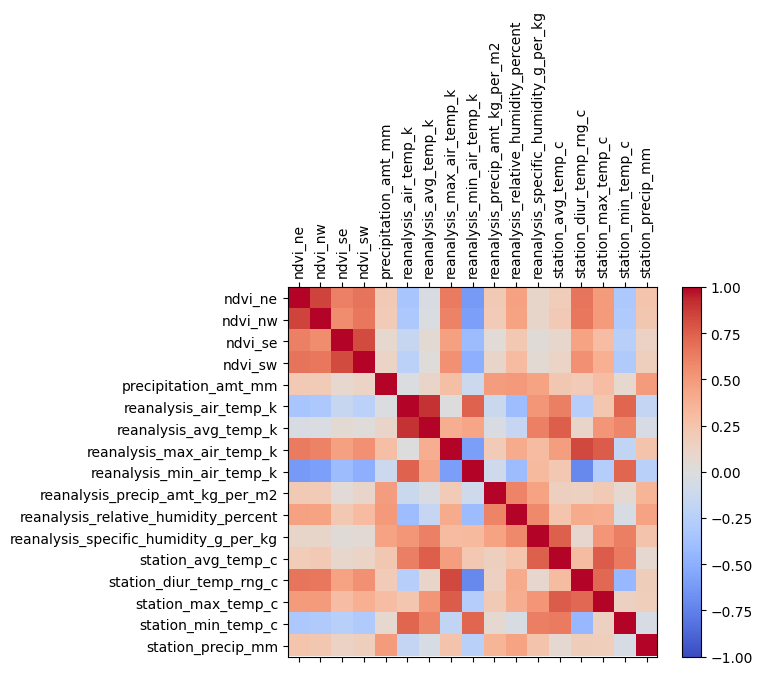

In [26]:
#correlation
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [27]:
df.isnull().sum()

ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_specific_humidity_g_per_kg     10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
dtype: int64

In [28]:
df['ndvi_ne'].fillna((df['ndvi_ne'].mean()), inplace=True)
df['ndvi_nw'].fillna((df['ndvi_nw'].mean()), inplace=True)
df['ndvi_se'].fillna((df['ndvi_se'].mean()), inplace=True)
df['ndvi_sw'].fillna((df['ndvi_sw'].mean()), inplace=True)
df['precipitation_amt_mm'].fillna((df['precipitation_amt_mm'].mean()), inplace=True)
df['reanalysis_air_temp_k'].fillna((df['reanalysis_air_temp_k'].mean()), inplace=True)
df['reanalysis_avg_temp_k'].fillna((df['reanalysis_avg_temp_k'].mean()), inplace=True)
df['reanalysis_max_air_temp_k'].fillna((df['reanalysis_max_air_temp_k'].mean()), inplace=True)
df['reanalysis_min_air_temp_k'].fillna((df['reanalysis_min_air_temp_k'].mean()), inplace=True)
df['reanalysis_precip_amt_kg_per_m2'].fillna((df['reanalysis_precip_amt_kg_per_m2'].mean()), inplace=True)
df['reanalysis_relative_humidity_percent'].fillna((df['reanalysis_relative_humidity_percent'].mean()), inplace=True)
df['reanalysis_specific_humidity_g_per_kg'].fillna((df['reanalysis_specific_humidity_g_per_kg'].mean()), inplace=True)
df['station_avg_temp_c'].fillna((df['station_avg_temp_c'].mean()), inplace=True)
df['station_diur_temp_rng_c'].fillna((df['station_diur_temp_rng_c'].mean()), inplace=True)
df['station_max_temp_c'].fillna((df['station_max_temp_c'].mean()), inplace=True)
df['station_min_temp_c'].fillna((df['station_min_temp_c'].mean()), inplace=True)
df['station_precip_mm'].fillna((df['station_precip_mm'].mean()), inplace=True)

In [29]:
df.head(20)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,299.8,295.9,32.00,73.365714,14.012857,25.442857,6.900000,29.4,20.0,16.0
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,300.9,296.4,17.94,77.368571,15.372857,26.714286,6.371429,31.7,22.2,8.6
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,300.5,297.3,26.10,82.052857,16.848571,26.714286,6.485714,32.2,22.8,41.4
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,301.4,297.0,13.90,80.337143,16.672857,27.471429,6.771429,33.3,23.3,4.0
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,301.9,297.5,12.20,80.460000,17.210000,28.942857,9.371429,35.0,23.9,5.8
5,0.142294,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,302.4,298.1,26.49,79.891429,17.212857,28.114286,6.942857,34.4,23.9,39.1
6,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,301.3,297.7,38.60,82.000000,17.234286,27.414286,6.771429,32.2,23.3,29.7
7,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,300.6,298.4,30.00,83.375714,17.977143,28.371429,7.685714,33.9,22.8,21.1
8,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,302.1,297.7,37.51,82.768571,17.790000,28.328571,7.385714,33.9,22.8,21.1
9,0.142294,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,302.3,298.7,28.40,81.281429,18.071429,28.328571,6.514286,33.9,24.4,1.1


In [30]:
df_test = pd.read_csv("dengue_features_test.csv")
df_test.head(20)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,sj,2008,23,2008-06-03,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,...,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,sj,2008,24,2008-06-10,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,...,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
7,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,30.81,300.484286,...,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
8,sj,2008,26,2008-06-24,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,...,17.10,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7
9,sj,2008,27,2008-07-01,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,...,11.90,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9


In [31]:
df_test = df_test.drop(["reanalysis_dew_point_temp_k", "reanalysis_tdtr_k", "reanalysis_sat_precip_amt_mm", "year", "weekofyear", "city", "week_start_date"], axis=1)


In [32]:
df_test['ndvi_ne'].fillna((df_test['ndvi_ne'].mean()), inplace=True)
df_test['ndvi_nw'].fillna((df_test['ndvi_nw'].mean()), inplace=True)
df_test['ndvi_se'].fillna((df_test['ndvi_se'].mean()), inplace=True)
df_test['ndvi_sw'].fillna((df_test['ndvi_sw'].mean()), inplace=True)
df_test['precipitation_amt_mm'].fillna((df_test['precipitation_amt_mm'].mean()), inplace=True)
df_test['reanalysis_air_temp_k'].fillna((df_test['reanalysis_air_temp_k'].mean()), inplace=True)
df_test['reanalysis_avg_temp_k'].fillna((df_test['reanalysis_avg_temp_k'].mean()), inplace=True)
df_test['reanalysis_max_air_temp_k'].fillna((df_test['reanalysis_max_air_temp_k'].mean()), inplace=True)
df_test['reanalysis_min_air_temp_k'].fillna((df_test['reanalysis_min_air_temp_k'].mean()), inplace=True)
df_test['reanalysis_precip_amt_kg_per_m2'].fillna((df_test['reanalysis_precip_amt_kg_per_m2'].mean()), inplace=True)
df_test['reanalysis_relative_humidity_percent'].fillna((df_test['reanalysis_relative_humidity_percent'].mean()), inplace=True)
df_test['reanalysis_specific_humidity_g_per_kg'].fillna((df_test['reanalysis_specific_humidity_g_per_kg'].mean()), inplace=True)
df_test['station_avg_temp_c'].fillna((df_test['station_avg_temp_c'].mean()), inplace=True)
df_test['station_diur_temp_rng_c'].fillna((df_test['station_diur_temp_rng_c'].mean()), inplace=True)
df_test['station_max_temp_c'].fillna((df_test['station_max_temp_c'].mean()), inplace=True)
df_test['station_min_temp_c'].fillna((df_test['station_min_temp_c'].mean()), inplace=True)
df_test['station_precip_mm'].fillna((df_test['station_precip_mm'].mean()), inplace=True)


In [33]:
df_test.isnull().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

In [34]:
df_test.head(20)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,301.1,296.4,25.37,78.781429,15.918571,26.528571,7.057143,33.3,21.7,75.2
1,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,300.8,296.7,21.83,78.230000,15.791429,26.071429,5.557143,30.0,22.2,34.3
2,-0.001500,0.126803,0.151083,0.091529,3.66,299.455714,299.357143,302.2,296.4,4.12,78.270000,16.674286,27.928571,7.785714,32.8,22.8,3.0
3,0.126050,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,303.0,296.9,2.20,73.015714,15.775714,28.057143,6.271429,33.3,24.4,0.3
4,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,302.3,297.3,4.36,74.084286,16.137143,27.614286,7.085714,33.3,23.3,84.1
5,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,299.728571,301.9,297.6,22.55,76.557143,16.667143,28.000000,5.171429,32.8,25.0,27.7
6,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,300.007143,302.4,297.5,13.10,76.844286,17.010000,27.400000,6.042857,31.1,23.3,91.7
7,0.126050,0.082150,0.144371,0.116729,30.81,300.484286,300.578571,303.5,297.5,7.20,76.870000,17.420000,28.757143,6.985714,34.4,24.4,0.3
8,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,300.621429,302.5,298.5,17.10,77.395714,17.678571,28.657143,6.242857,32.8,23.9,28.7
9,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,300.528571,302.3,298.7,11.90,78.534286,17.808571,28.457143,4.628571,31.1,25.0,2.9


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
x=df
df_lable = pd.read_csv("dengue_labels_train.csv")
y =df_lable['total_cases']

In [39]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model = regr.fit(x,y)

In [41]:
y_pred =model.predict(df_test)
type(y_pred)

numpy.ndarray

In [42]:
y_pred = np.round(y_pred)
y_pred

array([ 22.,  25.,  22.,  22.,  35.,  38.,  37.,  38.,  38.,  38.,  39.,
        38.,  49.,  38.,  40.,  40.,  50.,  41., 134.,  50.,  51.,  40.,
        47.,  39.,  39.,  39.,  38.,  39.,  39.,  39.,  39.,  27.,  24.,
        34.,  20.,   9.,  20.,  33.,  22.,  24.,  21.,  21.,  21.,  21.,
        22.,  21.,  21.,  21.,  20.,  21.,  21.,  21.,  25.,  21.,  28.,
        25.,  38.,  35.,  38.,  38.,  39.,  39.,  38.,  40.,  39.,  49.,
        39.,  38.,  39.,  42., 123.,  39.,  39.,  38.,  40.,  41.,  52.,
        39.,  39.,  38.,  38.,  38.,  38.,  48.,  38.,  49.,  36.,   9.,
        24.,  22.,  22.,  22.,  24.,  21.,  23.,  24.,  35.,  19.,  20.,
        22.,  38.,  21.,  21.,  28.,  38.,  39.,  37.,  38.,  39.,  51.,
        41.,  39.,  40.,  41.,  49.,  51.,  41.,  41.,  40.,  51.,  42.,
        59.,  50.,  60.,  49.,  40.,  38.,  39.,  60.,  49.,  40.,  46.,
        39.,  25.,  35.,  25.,  20.,  22.,  21.,  25.,  21.,  22.,  27.,
        25.,  24.,  22.,  24.,  21.,  21.,  21.,  2

In [43]:
type(y_pred)

numpy.ndarray

In [66]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Ensure that the lengths of y_actual and y_pred match
# y = y[:len(y_pred)] # Truncate y_pred to match the length of y
# y_pred = np.pad(y_pred, (0, len(y) - len(y_pred)), 'constant')

# mae = mean_absolute_error(y, y_pred)
# mse = mean_squared_error(y, y_pred)
# rmse = np.sqrt(mse)

# # Compute R-squared
# r2 = r2_score(y, y_pred)

# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("R-squared:", r2)

Mean Absolute Error: 30.560096153846153
Mean Squared Error: 4178.670673076923
Root Mean Squared Error: 64.64263819706713
R-squared: -0.023358238789148444


In [46]:
df_test = pd.read_csv("dengue_features_test.csv")
submission = pd.DataFrame({
    'year': df_test['year'],
    'weekofyear': df_test['weekofyear'],
    'city': df_test['city'],
    'total_cases': y_pred
})

In [47]:
submission.to_csv('submission_format.csv', index=False)

In [51]:
df_sub = pd.read_csv("submission_format.csv")
df_sub

,year,weekofyear,city,total_cases
0,2008,18,sj,22.0
1,2008,19,sj,25.0
2,2008,20,sj,22.0
3,2008,21,sj,22.0
4,2008,22,sj,35.0
...,...,...,...,...
411,2013,22,iq,8.0
412,2013,23,iq,8.0
413,2013,24,iq,8.0
414,2013,25,iq,8.0


from matplotlib import pyplot as plt
df_sub['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sub['weekofyear'].plot(kind='hist', bins=20, title='weekofyear')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sub['total_cases'].plot(kind='hist', bins=20, title='total_cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_sub.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sub.plot(kind='scatter', x='year', y='weekofyear', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sub.plot(kind='scatter', x='weekofyear', y='total_cases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['weekofyear']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_sub.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('weekofyear')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['total_cases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_sub.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('total_cases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_sub.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_sub['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_sub['weekofyear'].plot(kind='line', figsize=(8, 4), title='weekofyear')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_sub['total_cases'].plot(kind='line', figsize=(8, 4), title='total_cases')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_sub['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_sub, x='year', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_sub['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_sub, x='weekofyear', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_sub['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_sub, x='total_cases', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)